## Kernels, kernel trick, kernel regression and SVM

This short series of exercises serves as an introduction to the notion of Kernel

### Exercise 1.

__1.a Non Linear features + Linear classifier__ 

Consider the dataset below. This dataset is not linearly separable. However, as we previously discussed, one can bring the data into another (higher dimensional) space and then learn a separating plane in the new space. What would be good features to add to the model to make the data separable ? 

(Try to think of a (geometric) feature that makes the yellow points different from the purple ones. Look at the axes, what is particular to the yellow prototypes?) 

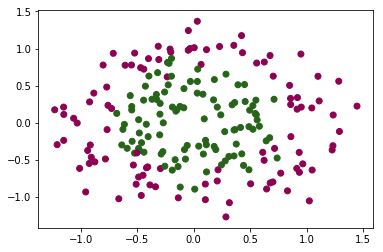

In [20]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_classification
from matplotlib import cm


X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=1)


X,y =  make_circles(n_samples = 200, noise=0.2, factor=0.5, random_state=1)

figure = plt.figure()

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.set_cmap('PiYG')
plt.show()

__1.b__ Apply your transformation to the data and plot the result in a 3D space. Then learn the separating plane from the minimization of a RSS criterion and plot the plane in the 3D space using the function 'surf' from matplotlib

In [ ]:
# put the code here

import matplotlib.pyplot as plt



### Exercise 2. Kernels 

Now consider the following two datasets

__Example 1. (Scikit Moons DataSet)__ 

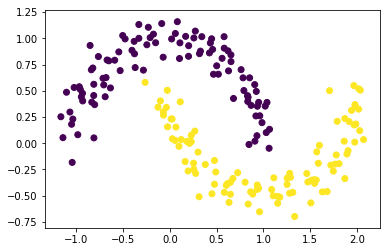

In [87]:
X, y = make_moons(n_samples = 200, noise=0.1, random_state=0)


figure = plt.figure()
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()



__Example 2. (Dog Dataset)__

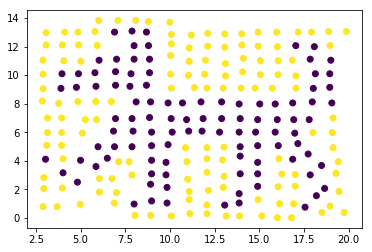

In [83]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import scipy.io as sio

mat_contents = sio.loadmat('KernelClassification.mat')

X = mat_contents['data']#[:,0:1]
#y = mat_contents['data'][:,2]

x1 = X[:,0:2]
y1 = X[:,2]

plt.scatter(x1[:,0], x1[:,1], c= y1)
plt.show()

__2a. Are those datasets linearly separable ?__ How would you proceed to learn the countour of the dog, or to separate the two cresecent shapes?

For more complex datasets such as the datasets given above, one could indeed use a lot of additional features, $x_1$, $x_2$, $x_1x_2$, $x_1^2$, $x_2^2$, ... Until the data can be put in a suffciently high dimensional space so that it can be separated. But this approach requires a possible infinite number of features when the boundaries are complex. Moreover those features are often not known..


Instead of having to explicitely increase the dimension of the data and then learn a linear classifier. We would prefer to have a model that only depends on our original number of prototypes. That is if we originally have __N points__ that are split into __two classes__ such as above, but we need every monomial as a feature to separate the two clusters ($K = \infty$), we would like a model whose __complexity remains $O(N)$__ and not $O(K)$. 

This is precisely what Kernels are designed for.  Kernels keep track of the similarity between pairs of points from the training set instead of storing long feature vectors. An example of kernel is the Gaussian Kernel, also sometimes called RBF. 

\begin{align}
\kappa(\boldsymbol x, \boldsymbol x') = \exp(-\|\boldsymbol x - \boldsymbol x'\|^2/(2\sigma^2))
\end{align}


__2b.__ Learn a RSS model for the boundary in Examples 1 and 2 above using the kernel trick with the RBF kernel. Make the value of $\sigma$ vary and study the effect of $\sigma$ on the boundary you learn. Then study generalization by either increasing the size of the dataset and using train_test_split (crescent moons) or generating a few new points from the $[0,14]\times [1,20]$ space and studying whether they are correctly classified as dog vs non dog.

In [ ]:
from sklearn.kernel_ridge import KernelRidge
import numpy as np

# put the code here




### Exercise 3. Support Vector Machines.

So far we have seen how to learn a classifier by minimizing the sum of squared residuals. When learning the separating plane from the training data, many choices are in fact possible for the separating plane. A good idea is to try to minimize generalization error. Maximal Margin classifiers relies on the notion of 'margin'. The margin can be defined as the 'smallest distance between the decision boundary and any of the samples' (CM Bishop) 

<img src="SVM_margin.png" alt="Drawing" style="width: 300px;"/>

__3a.__ Using the Support vector classifier from Scikit-learn, learn the boundary for the dog shaped dataset above.

In [ ]:
from sklearn.svm import SVC

# put your code here



__3b.__ Now that we have a serious classifier, combining the adaptive power of kernels with the robustness of maximum margin, we can start looking at more interesting datasets. Using the lines below load the 'Labeled Faces in the Wild (LFW) people dataset' from Scikit-learn. 

- Display some of the faces together witht their labels. 
- Split the data into training and test

In [ ]:
import matplotlib.pyplot as plt


from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

X = lfw_people.data
y = lfw_people.target

# split the dataset into a training and a test parts


- Learning a classifier on the raw images is a little heavy. To avoid dealing with all pixels, before applying our SVC classifier to the dataset we will compress the images by using the SVD as we did at the very beginning of the class to denoise (See LAB 1). This step is done for you below. Here we consider the whole set of images as the columns of a very large matrix and we retain the dimension 150 subspace that best approximates all the faces. That is we approximate each image as 
\begin{align}
I = a_1 I_1 + a_2 I_2 + \ldots + a_{150} I_{150}
\end{align}
From some $150$ basis images learned for you below. The compressed images are then returned in X_train_compressed and X_test_compressed. The targets do not change. 

In [ ]:
n_components = 150

pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_compressed = pca.transform(X_train)
X_test_compressed = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

- Using the compressed images together with the SVC classifier from Scikit-learn, learn a Maximal Margin classifier for the face dataset

In [ ]:
# put your code here


